In [187]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import random

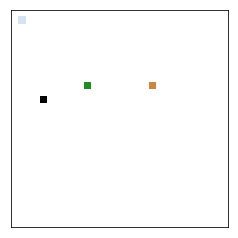

In [188]:
class Grid:
    
    def __init__(self, para):
        # Create board of specifc board size 
        self.grid = np.zeros((para[0], para[0]), dtype=float)
        self.nest_value = 10
        self.food_source_value = 1000
        self.ant_value = 5
        self.pheromone_strength = para[1]
        self.pheromone_fade = para[2]

    # Get neighbour xy coordinates as tuple  
    def check_neighbours(self, coord, grid_size):
        # Initalize variables
        neighbours = []

        # List of relative position for all possible neighbours of a coordinate
        adj = [(-1, 1), (0, 1), (1, 1), (-1, 0), (1, 0), (-1, -1), (0,-1), (1,-1)]

        # Create list of all possible nieghbours
        for n in adj:
            neighbours.append(tuple(np.subtract(coord, n)))

        # In case of corners and edge pieces: find all neighbours that exist but are not valid for the specific board
        neigh = []
        for n_tup in neighbours:
            if n_tup[0] < 0 or n_tup[1] < 0:
                neigh.append(n_tup)
            elif n_tup[0] > grid_size or n_tup[1] > grid_size:
                neigh.append(n_tup)

        # Remove the found none valid neighbours 
        for i in neigh:
            neighbours.remove(i)

        # Return list of neighbours as tuple
        return neighbours

    # change value at specific cell, returns new grid
    def change_cell_value(self, coord, new_value):
        self.grid[coord[1]][coord[0]] = new_value
        return self.grid

    # return which value a cell has
    def check_cell_value(self, coord):
        return self.grid[coord[1]][coord[0]]
    
    def getKind(self, coord):
        x = coord[0]
        y = coord[1]
        return self.grid[y, x]

    def setKind(self, coord, value):
        x = coord[0]
        y = coord[1]
        if value is not 5 and value is not 10 and value < 100:
            return "Invalid value"
        self.grid[y, x] = value

    def antArrives(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] += self.ant_value

    def antLeaves(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] -= self.ant_value
        self.addPheromone(coord)

    def addPheromone(self, coord):
        x = coord[0]
        y = coord[1]
        self.grid[y, x] += pheromone_strength

    def pheromoneFade(self, coord):
        # The cell must already have pheromones
        x = coord[0]
        y = coord[1]
        self.grid[y, x] -= phereomone_fade

    def retrieveFood(self, coord):
        # The cell must be of the kind food source
        x = coord[0]
        y = coord[1]
        self.grid[y, x] -= self.food_value;
    
    def setNestLocation(self, coord):
        x = coord[0]
        y = coord[1]
        self.setKind(coord, self.nest_value)

    def setFoodSource(self, coord):
        x = coord[0]
        y = coord[1]
        self.setKind(coord, self.food_source_value)

    def origin_distance(self, coord, origin):
        val = np.square(coord[0]-origin[0])+np.square(coord[1]-origin[1])
        return np.sqrt(val)
        
    def possible_steps_list(self, coord, origin):
        pn = self.check_neighbours(coord)
        dist = self.origin_distance(coord, origin)
        
        best_neigh = []
        for n in pn:
            distance = self.origin_distance(n, origin)
            if distance > dist:
                best_neigh.append(n)
        return best_neigh
        
    def decide_step_worker(self, coord, origin):
        possible_steps = possible_steps_list(coord, origin)
        pos_step = []
        for p in possible_steps:
            if 0 < self.check_cell_value(p) <= 1:
                pos_step.append(p)
        
        pos_step_sum = pos_step.sum()
        probability_distribution = []
        for pos in pos_step:
            probability_distribution.append(self.check_cell_value(pos)/pos_step_sum)
        return choice(pos_step, 1, p=probability_distribution)
    
    def decide_step_search(self, coord, origin):
        possible_steps = self.possible_steps_list(coord, origin)
        return random.choice(possible_steps)
    
    def antSetStep(self, coord, nextCoord):
        x = coord[0]
        y = coord[1]
        x_next = nextCoord[0]
        y_next = nextCoord[1]
        self.grid[y_next, x_next] += self.ant_value
        self.grid[y, x] -= self.ant_value
        self.grid[y, x] += self.pheromone_strength

    def routeBack(self, coord, origin):
        x = coord[0]
        y = coord[1]

        x_new = x
        y_new = y

        x_orig = origin[0]
        y_orig = origin[1]

        dx = x - x_orig
        dy = y - y_orig

        # Three possibilities: ant is on the same x or y coordinate, in which case it
        # can walk back in a straight line.
        # Or the x-distance is the same as the y-distance, in whcih case the ant can 
        # walk back in diagonal line.
        # Else, the ant should walk back in a partly diagonal, partly straight line.

        while x != x_orig and y != y_orig:
            if x == x_orig:
                x_new += dx / np.abs(dx)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                continue

            if np.abs(dx) == np.abs(dy):
                x_new += dx / np.abs(dx)
                y_new += dx / np.abs(dy)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                y = y_new
                continue

            while y != y_orig:
                x_new += dx / np.abs(dx)
                y_new += dx / np.abs(dy)
                self.antSetStep((x, y), (x_new, y_new))
                x = x_new
                y = y_new

            y_new += dy / np.abs(dy)
            self.antSetStep((x, y), (x_new, y_new))
            y = y_new

    # update board
    def renew_board(self):
        for i in self.grid:
            for j in i:
                # Check wat er staat if 0 continue
                # if mier
                    #wat voor mier
                        # dan stap zetten
                            # cost omhoog
                            #TODO: code nodig waar stap heen
                                # Mag niet achteruit tenzij hij in de origin is, objective= altijd verder van origin
                            # drop phero
                # if phero
                    # fade Phero
                # if foodsource
                    # is er mier? Dan minder food
                    # cost omlaag
                pass
            
    def showGrid(self):
        # Amount of different colors for pheromones
        pheromone_amount = 80
        
        # Blue gradient for pheromones: the darker the blue, the more pheromones
        pher_colors = cm.Blues(np.linspace(0, 1, num=pheromone_amount)).tolist()
        pher_bounds = pher_bounds = np.linspace(0,1,num=pheromone_amount+1).tolist()
        
        # Other color: nothing, ant, nest and food source
        other_colors = ['white', 'black', 'white', 'peru', 'white', 'forestgreen']
        
        # Boundaries for the values of the other colors
        other_bounds = [1.00001, self.ant_value, 6.00001, 9.99999, self.nest_value + 0.01, 99.99999, 100.0]
        total_colors = sum([pher_colors, other_colors], [])
        total_bounds = sum([pher_bounds, other_bounds], [])
        
        # If the value is 0, the cell is white
        total_colors[0] = 'white'
        
        # Create a cmap of all the colors
        cmap = mpl.colors.ListedColormap(total_colors)
        norm = mpl.colors.BoundaryNorm(total_bounds, cmap.N)
        
        img = plt.imshow(self.grid,interpolation='nearest', cmap=cmap, norm=norm)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
        
    
world = Grid([30, 1, 2])

#print(world.grid)
world.change_cell_value((4,12), 5)
world.change_cell_value((1,1), 0.2)
world.setNestLocation((19,10))
world.setFoodSource((10, 10))
world.showGrid()